In [ ]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


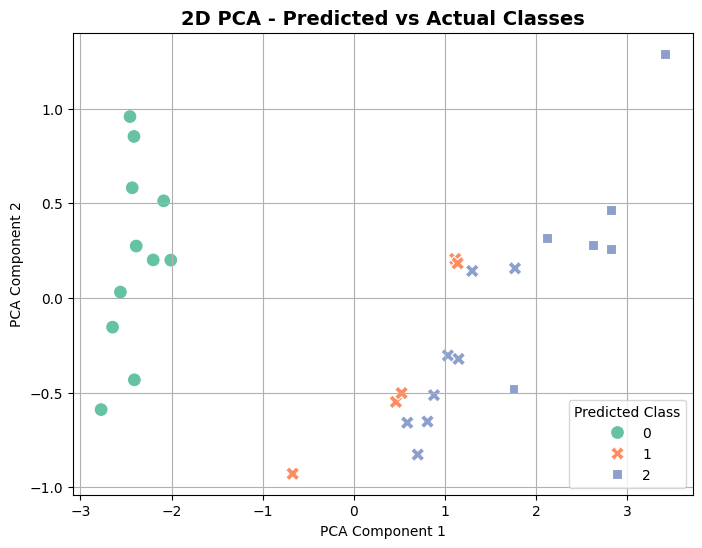

In [ ]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

# Create model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile and train
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# 🎯 Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=y_pred_classes, style=y_true,
                palette='Set2', s=100)

plt.title("2D PCA - Predicted vs Actual Classes", fontsize=14, weight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Predicted Class")
plt.show()